# Data Visualization

> Objective of this project was to visualize a dataset by creating various graphs.
> The dataset contais details about passengers on the Titanic. The  dataset is already prepared for data analysis.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df= pd.read_csv("Titanic_cleaned.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,SizeOfFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,1


In [4]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    object 
 11  Age Group     891 non-null    object 
 12  SizeOfFamily  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
# Check for missing values
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Age Group       0
SizeOfFamily    0
dtype: int64

In [6]:
# Get summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.758889,13.002570,0.42,22.0000,30.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
SizeOfFamily,891.0,1.904602,1.613459,1.00,1.0000,1.0000,2.0,11.0000


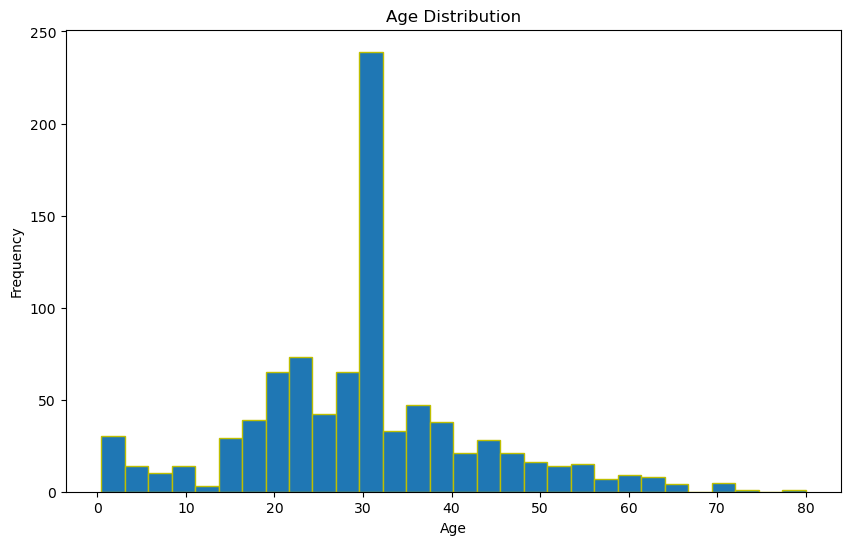

In [7]:
# Plot histogram of Age distribution

plt.figure(figsize=(10, 6))
plt.hist(df["Age"], bins=30, edgecolor="y")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

> The above histogram shows the age distribution. The above histogram show that most people in the titanic were around 30 years old. We can also abserve that there is significant number of people between range age of 20 to 40

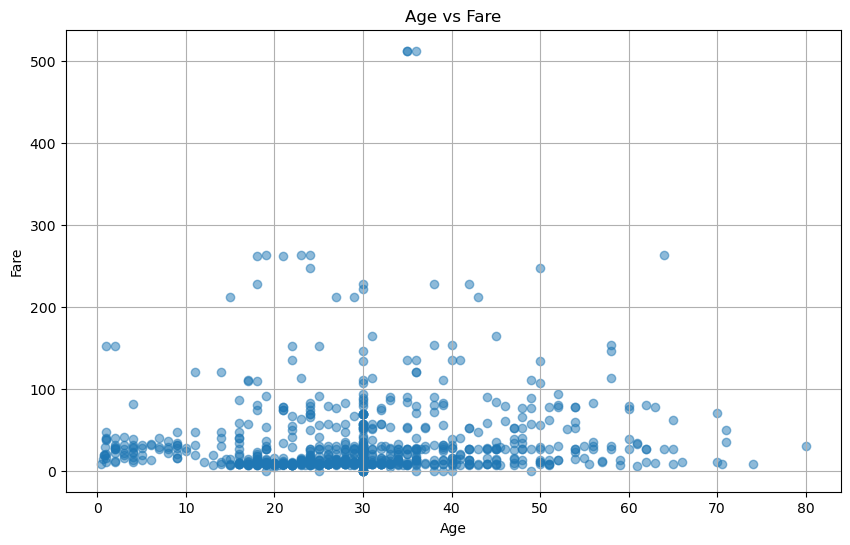

In [8]:
# Scatter plot of 'Age' vs 'Fare'
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

> The above scatter plot show that most people from all age paid between O to 100.

In [60]:
# CAlculate number of passengers per passenger  class
passengers_per_class= df["Pclass"].value_counts()
passengers_per_class

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

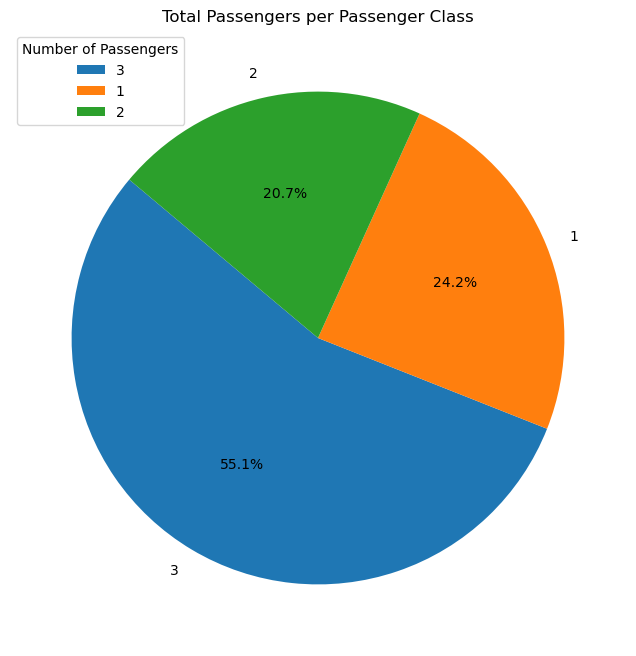

In [63]:
# Plot bar chart showing number of passenger per passenger class
plt.figure(figsize=(8,8))
plt.pie(passengers_per_class,labels=["3","1", "2"], autopct="%1.1f%%", startangle=140)
plt.title("Total Passengers per Passenger Class")
plt.legend(title="Number of Passengers", loc="upper left")
plt.show()

> The above pie chart show the total passenger in each passenger class. The chart shows  that over 50% of the passenger in the titanic paid for 3rd class ticket

In [30]:
# calculate survival rate per passenger class
survival_rate_per_Passenger_class=df.groupby("Pclass")["Survived"].value_counts(normalize= True).unstack()
survival_rate_per_Passenger_class

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


<Figure size 1000x600 with 0 Axes>

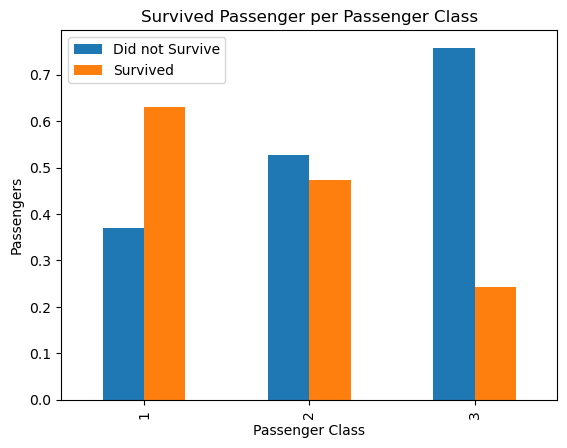

In [31]:
# Plotting bar chart survival rate per passenger class
plt.figure(figsize=(10,6))
survived_passenger_per_Passenger_class.plot(kind='bar')
plt.title("Survived Passenger per Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Passengers")
plt.legend(["Did not Survive", "Survived"])
plt.show()

>Bar plot showing Compare survival rates across the three passenger classes (1st, 2nd, and 3rd). This shows the passengers in 1st class have a better chance of survival, while passengers in 3rd class have a worse chance of survival. This suggest that social status played a role in determining who survived.

In [15]:
# calculate survival rates between males and females
survival_rate_by_sex=df.groupby("Sex")["Survived"].value_counts(normalize=True).unstack()
survival_rate_by_sex

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


<Figure size 1000x600 with 0 Axes>

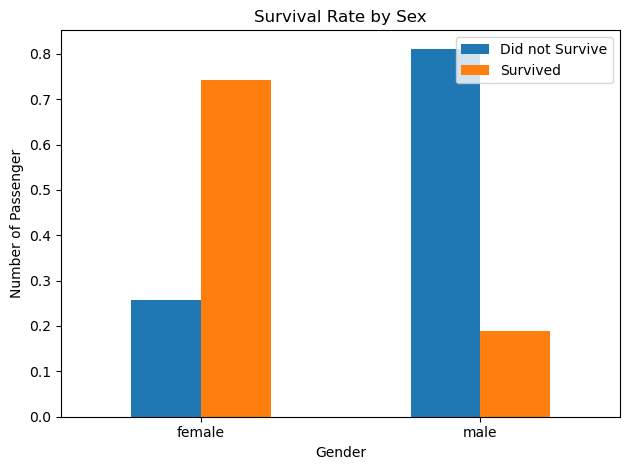

In [16]:
# Bar plot showing survival rates between males and females
plt.figure(figsize=(10,6))
survival_rate_by_sex.plot(kind="bar")
plt.title("Survival Rate by Sex")
plt.xlabel("Gender")
plt.ylabel("Number of Passenger")
plt.xticks(rotation=0)
plt.legend(["Did not Survive", "Survived"])
plt.tight_layout()
plt.show()

> The above chart shows survival rates between males and females. The chart highlight how gender impacted survival. Over 70% of female suvirved and over 80% male did not survive. This maybe caused by that women were prioritized.

In [17]:
# Calculate total number of passengers  in each embarkation port (C = Cherbourg, Q = Queenstown, S = Southampton).
embarked_distribution=df["Embarked"].value_counts()
embarked_distribution

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

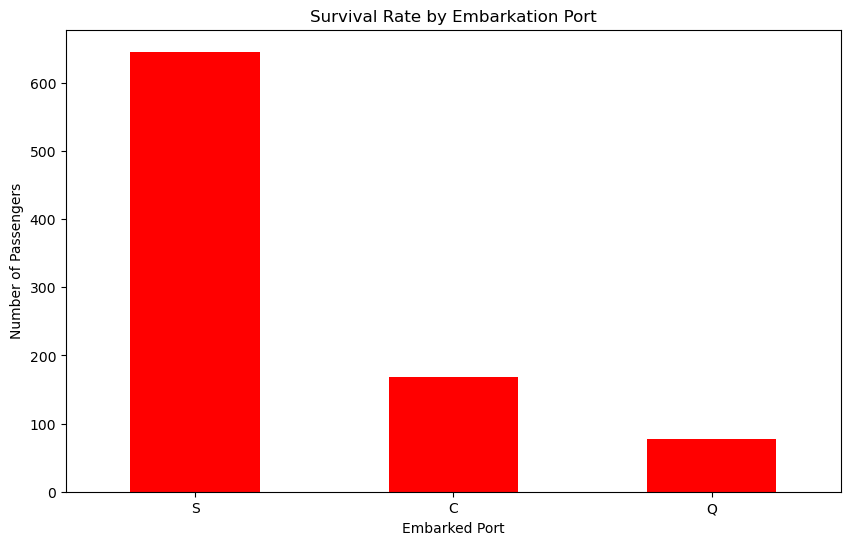

In [18]:
# bar plot total number of  passengers in each embarkation port
plt.figure(figsize=(10,6))
embarked_distribution.plot(kind="bar", color="r")
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarked Port')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

> The above bar chart showing total number of  passengers in each embarkation port(C = Cherbourg, Q = Queenstown, S = Southampton). More than 600 passengers were bordered in Southampton 

In [37]:
# Calculate the survival rate in each embarkation port
survival_rate_by_embarked_port= df.groupby("Embarked")["Survived"].value_counts(normalize= True).unstack()
survival_rate_by_embarked_port

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009


<Figure size 1000x600 with 0 Axes>

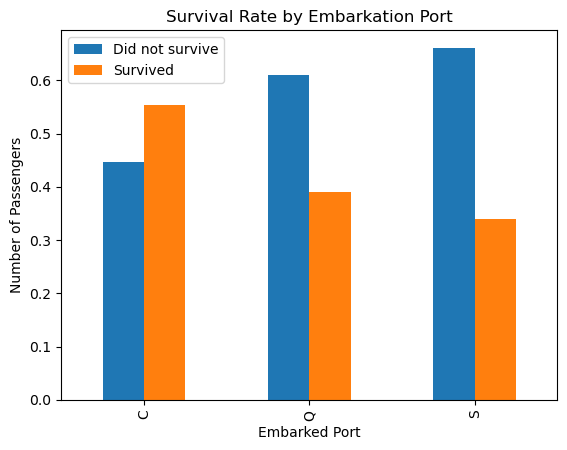

In [39]:
# Plot the survival rate by embarkation port
plt.figure(figsize=(10,6))
survival_rate_by_embarked_port.plot(kind="bar")
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarked Port')
plt.ylabel('Number of Passengers')
plt.legend(['Did not survive', 'Survived'])
plt.show()

> The above bar plot showing survival rates based on the port where passengers boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton). This could reveal any significant differences in survival rates based on embarkation location. This shows that Southampton have the lowest survival rate.

In [47]:
# Total passenger on each family size
Total_number_of_family_size=df["SizeOfFamily"].value_counts()
Total_number_of_family_size

SizeOfFamily
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [22]:
# Calculate survival rate by size of the family
survival_rate_by_size_of_family= df.groupby("SizeOfFamily")["Survived"].value_counts(normalize= True).unstack()
survival_rate_by_size_of_family

Survived,0,1
SizeOfFamily,,
1,0.696462,0.303538
2,0.447205,0.552795
3,0.421569,0.578431
4,0.275862,0.724138
5,0.800000,0.200000
6,0.863636,0.136364
7,0.666667,0.333333
8,1.000000,NaN
11,1.000000,NaN


Text(0, 0.5, 'Survival Rate')

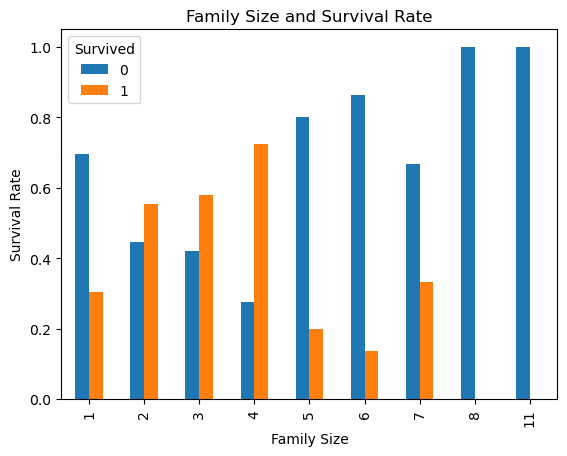

In [23]:
# Plot the survival rate by family size
plt.figure(figsize=(10,6))
survival_rate_by_size_of_family.plot(kind="bar")
plt.title('Family Size and Survival Rate')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

> Analyze the survival rate based on family size by summing the number of siblings/spouses and parents/children.This can show that larger family group have lowest survival chances.

In [42]:
total_passenger_per_age_group= df["Age Group"].value_counts()
total_passenger_per_age_group

Age Group
Young Adult    543
Adult          209
Child           68
Teenager        45
Senior          26
Name: count, dtype: int64

In [26]:
# Calxulate survival rate by age group
survival_rate_by_age_group= df.groupby("Age Group")["Survived"].value_counts(normalize = True).unstack()
survival_rate_by_age_group

Survived,0,1
Age Group,,
Adult,0.583732,0.416268
Child,0.426471,0.573529
Senior,0.730769,0.269231
Teenager,0.511111,0.488889
Young Adult,0.655617,0.344383


<Figure size 1000x600 with 0 Axes>

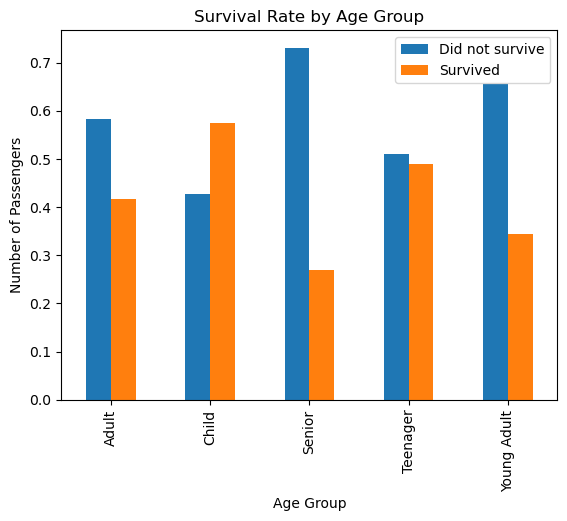

In [46]:
# Plot the survival rate by age group
plt.figure(figsize=(10,6))
survival_rate_by_age_group.plot(kind="bar")
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.legend(["Did not survive", "Survived"])
plt.show()

In [ ]:
> On the above bar graph we can seen that children have the highest surviving chances, that means that they were priortirize.  

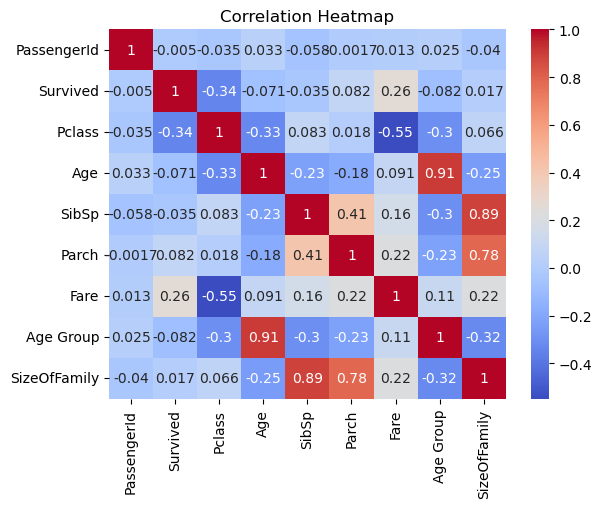

In [65]:
# Convert age group to numerical to find out if it have an correlation with 
df["Age Group"]= df["Age Group"].map({"Child":1, "Teenager":2, "Young Adult":3, "Adult":4, "Senior":5})
# Select only numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Generate the heatmap for correlations
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

>  positive correlation between Fare and survival and the negative correlation between Pclass and survival suggest that social status and wealth played a role in determining who survived. 